# Introduction to Regression in Supervised ML (with code walkthrough)

This is a beginner-friendly guide to **_regression_** in supervised machine learning. You’ll learn:

- What regression is and how it differs from classification.
- Examples of common regression algorithms.
- A hands-on example: Predicting house prices using synthetic data.

### What is Machine Learning
Machine Learning (ML) involves teaching or training a computer (or a model) to learn from examples (data) instead of giving it step-by-step instructions. It is a branch of artificial intelligence (AI) that employs statistical techniques to enable computer systems to learn patterns from data without explicit programming.
It is broadly categorized into:
- Supervised Learning: Training models using labelled datasets.
- Unsupervised Learning: Finding hidden patterns in data without labels.
- Reinforcement Learning: Learning through rewards and punishments.

### What is Supervised Machine Learning
Supervised learning is a type of ML where models learn from labelled data, meaning each training example (each row) includes both input features and a known correct output. The data has a column known as the target variable or independent variable. There are two main types:
- Regression: Predicting continuous values (e.g., predicting house prices).
- Classification: Predicting discrete labels (e.g., predicting loan default status).


### What is Regression
Regression is a type of supervised learning where the target variable is a number. It teaches the model how to predict a continuous value —how much time or how many people for instance.


### Examples of Regression Algorithms
Some commonly used regression algorithms include:
1. Linear Regression: Suitable for simple linear relationships.
2. Polynomial Regression: An extension of linear regression, effective when data shows a curved relationship.
3. Ridge and Lasso Regression: Regularized versions of linear regression to prevent overfitting.
4. Decision Tree Regression: Uses a tree-like model to capture complex patterns.
5. Random Forest Regression: An ensemble method that combines multiple decision trees.
6. Support Vector Regression (SVR): Uses support vector machines for regression tasks.
7. Gradient Boosting Machines (GBM): Includes XGBoost, LightGBM, and CatBoost, which are powerful for structured data.

### Example Workflow in Machine Learning
A typical machine learning workflow may include the following steps:
1. Data Collection: Gather relevant data for training and testing.
2. Data Preprocessing: Clean and prepare the data by handling missing values, scaling, and encoding categorical variables if needed.
3. Feature Selection: Choose the most important features for better model performance.
4. Model Selection and Training: Choose an appropriate regression algorithm and train the model using the training dataset.
5. Model Evaluation: Assess performance using metrics like Mean Squared Error (MSE) and R-squared.
6. Hyperparameter Tuning: Optimize the model for better accuracy.
7. Deployment: Deploy the trained model for real-world predictions.

## Code Walkthrough: Predicting House Prices With Machine Learning

### Step 1: Import the necessary libraries

In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation using DataFrames
import matplotlib.pyplot as plt # For visualization

# Import functions from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # To create and train a linear regression model
from sklearn.metrics import mean_squared_error  # To evaluate the model using Mean Squared Error (MSE)
from sklearn.metrics import r2_score  # To evaluate the model using R-squared (R²)

### Step 2: Generate a simple dataset

At this point, you will typically have to import a dataset using `read_csv` but we'll just create a synthetic dataset for this example.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
# By setting the seed with np.random.seed(42), you ensure that anyone running the code will get the same random numbers,
# making your results reproducible.
# The number 42 is often used as a default seed in examples. However, you can set the seed to any integer value.
# The reason 42 is commonly chosen is not technical, but rather cultural.
# It's a reference to the book "The Hitchhiker's Guide to the Galaxy" by Douglas Adams,
# where 42 is humorously declared as the "Answer to the Ultimate Question of Life, the Universe, and Everything."


# Number of samples
num_samples = 100


# Generate synthetic data based on ranges and patterns from the original data
sizes = np.random.randint(1400, 3000, num_samples)  # Random sizes between 1400 and 3000 sq ft
bedrooms = np.random.choice([2, 3, 4, 5, 6], num_samples)  # Random number of bedrooms between 2 and 6

# Generate prices based on a linear relationship with size and bedrooms, and add some noise
base_price = 200000 + sizes * 100 + bedrooms * 50000
prices = base_price + np.random.normal(0, 25000, num_samples)  # Add noise

In [3]:
# Create DataFrame
data = {
    'Size (sq ft)': sizes,
    'Bedrooms': bedrooms,
    'Price ($)': prices.astype(int)  # Convert to integer
}

df = pd.DataFrame(data)

# Display the first few rows of the generated data
df.head()

,Size (sq ft),Bedrooms,Price ($)
0,2526,6,752212
1,2859,6,785215
2,2260,3,596446
3,2694,6,743034
4,2530,3,584041


### Step 3 Exploratory Data Analysis (EDA)

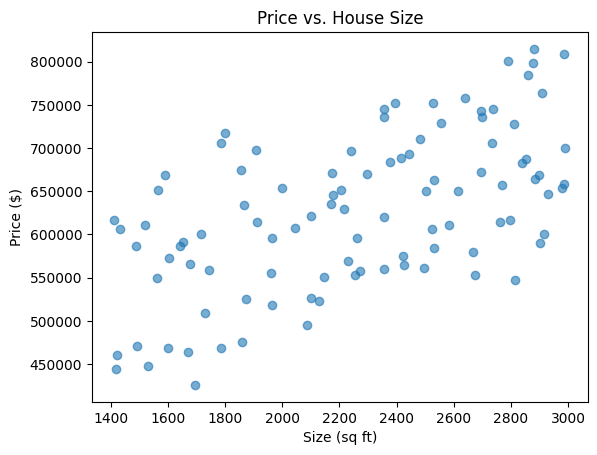

In [4]:
# Let's use a scatterplot to see if there's a relationship between Price and House size

plt.scatter(df['Size (sq ft)'], df['Price ($)'], alpha=0.6)
#  `alpha` controls the transparency of the points in the scatter plot.
plt.title("Price vs. House Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.show()

# Here we’ll see that Larger houses generally cost more (i.e. there’s a
# positive correlation) %%

Practice: Try Price vs. Bedrooms

### Step 4: Separate features and target variable

In [5]:
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price ($)']

### Step 5: Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X: Features (independent variables) in the dataset
# y: Target (dependent variable) in the dataset

# test_size=0.2: Specifies that 20% of the data should be used for the
# test set, and the remaining 80% for the training set.

# random_state=42: Ensures that the data is split in the same way every time
# you run the code, providing reproducibility.
# The number 42 is arbitrary and can be any integer.

# X_train: Training data for the features
# X_test: Testing data for the features

# y_train: Training data for the target
# y_test: Testing data for the target

### Step 6: Choose and train the model

In [7]:
model = LinearRegression()  # Initialize a Linear Regression model
model.fit(X_train, y_train) # Train the model using the training data (X_train) and the corresponding target values (y_train)

LinearRegression()

### Step 7: Make predictions

In [8]:
y_pred = model.predict(X_test) # Use the trained model to make predictions on the test data (X_test)

# For curiosity’s sake Check predictions vs. actual values:
print(y_pred) # To view your predictions
print(y_test) # To view the actual answers

[653613.91592729 446057.95711906 784632.2300408  548577.0936828
 732163.66045402 514438.30020816 620984.7095048  546866.09177618
 477277.25956032 749183.21565588 617359.24212453 446158.66454629
 665899.19769304 530249.36628325 464286.00144767 605778.91234938
 651096.23024654 651600.79173898 644548.19876401 613229.21325181]
83    662758
53    444644
70    798252
45    555644
44    736025
39    526829
22    650951
80    574608
10    508837
0     752212
18    635095
30    460053
73    671174
33    553013
90    468280
4     584041
76    650113
77    658833
12    586231
31    591413
Name: Price ($), dtype: int64


### What happens in the backend though?

#### Linear Regression Algorithm
Model Formula:

- `𝑦 = 𝜃0 + 𝜃1𝑥1 + 𝜃2𝑥2`

Where:
- `𝜃0`  is the intercept
- `𝜃1` is the coefficient for house size
- `θ2` is the coefficient for number of bedrooms
- `𝑥1` is house size
- `𝑥2`  is number of bedrooms

In [9]:
# Get out the coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 207181.98844232725
Coefficients: [  100.70742723 47935.71100514]


##### The linear regression equation based on these results would be:

`𝑦 = 207181.98844232725 + 100.70742723 * (House Size (sq ft)) + 47935.71100514 * (Bedrooms)`

### Step 8: Evaluate the model

In [10]:
mse = mean_squared_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the actual values (y_test) and the predicted values (y_pred)

rmse = np.sqrt(mse)
# Calculate the Root Mean Squared Error (RMSE) by taking the square root of the MSE, which provides the error in the same units as the target variable

- In essence, you find the **errors** (subtract each predicted value from the actual value) **E**
- **Square** these errors ___________________________________________**S**
- find the **mean** (average) of all of them __________________**M**
- and take the square**root** _________________________________**R**


In [11]:
# print("Predictions:", y_pred)
# print("Actual values:", y_test.values)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 20777.986564024104


In [12]:
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"R-squared: {r2:.2f}") # ".2f" output in 2 decimal places

R-squared: 0.95


### What do these metrics mean??
- **RMSE (Root Mean Squared Error)** tries to answer the question: "How large, on average, are the errors in my model's predictions?"
    - **Optimal Value**: As close to 0 as possible.
    - Lower RMSE indicates that the predictions are closer to the actual values, meaning smaller errors.
    - Note that for values ranging over 500k, 20k is an acceptable RMSE value. This won't be the case for values below 100k for instance. A good RMSE in this case could  be around 2k or less.

- **R-squared (`R²`)** tries to answer the question: "How well do my model's predictions explain the variability ("distance" from the mean) in the actual data?"
    - In essence how good is my model in making predictions
    - **Optimal Value**: As close to 1 as possible.
    - R² = 1 means the model predicted everything perfectly.
     - R² = 0.5 means the predictions were no better than just using the average price of all the houses in the case.
     - R² less than 0.5 means the predictions were worse than just using the average every time.


### Predict the price of a new house

In [ ]:
new_house = pd.DataFrame([[2500, 4]], columns=['Size (sq ft)', 'Bedrooms'])
predicted_price = model.predict(new_house)
print(f"Predicted price: ${predicted_price[0]:,.2f}")

In [15]:
new_house = pd.DataFrame([[2500, 4]], columns=['Size (sq ft)', 'Bedrooms'])  # Size: 2500 sq ft, 4 bedrooms
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")

Predicted price for the new house: $650,693.40


### Next Steps:
You can try this code with real datasets ( e.g., [Chicago House Prices](https://www.kaggle.com/datasets/tawfikelmetwally/chicago-house-price) )


---
_**Your Dataness**_,  
**`Obinna Oliseneku`** (_**Hybraid**_)  
**[LinkedIn](https://www.linkedin.com/in/obinnao/)** | **[GitHub](https://github.com/hybraid6)**  